**1**. **Import required** **libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

**2. Load the datasets**

In [2]:
sentiment_df = pd.read_csv("/content/fear_greed_index.csv")
sentiment_df

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
...,...,...,...,...
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01


In [3]:
trades_df = pd.read_csv("/content/historical_data.csv")
trades_df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12


**3. preprocessing**

In [4]:
trades_df.columns = trades_df.columns.str.strip()
trades_df['Timestamp IST'] = pd.to_datetime(trades_df['Timestamp IST'], dayfirst=True, errors='coerce')
trades_df['date'] = trades_df['Timestamp IST'].dt.date

In [5]:
trades_daily = trades_df.groupby('date').agg({
    'Side': 'count',
    'Size USD': 'sum',
    'Fee': 'sum',
    'Execution Price': 'mean'
}).rename(columns={
    'Side': 'num_trades',
    'Size USD': 'total_volume',
    'Fee': 'total_fees',
    'Execution Price': 'avg_exec_price'
}).reset_index()

In [6]:
trades_daily['num_buys'] = trades_df.groupby('date')['Side'].apply(lambda x: (x == 'BUY').sum()).values
trades_daily['num_sells'] = trades_df.groupby('date')['Side'].apply(lambda x: (x == 'SELL').sum()).values

In [7]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date

In [8]:
merged = pd.merge(trades_daily, sentiment_df, on='date')


**4. EDA**

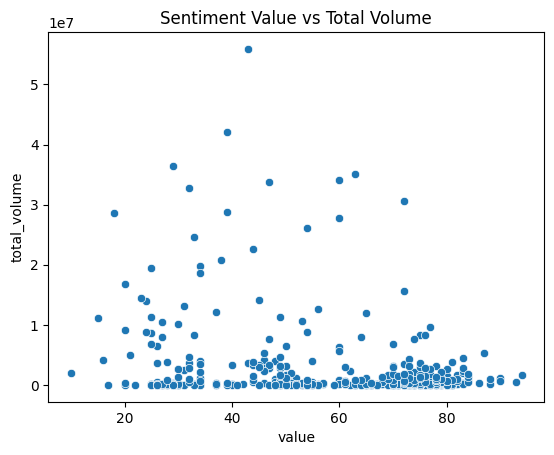

In [9]:
plt.figure()
sns.scatterplot(data=merged, x='value', y='total_volume')
plt.title('Sentiment Value vs Total Volume')
plt.show()

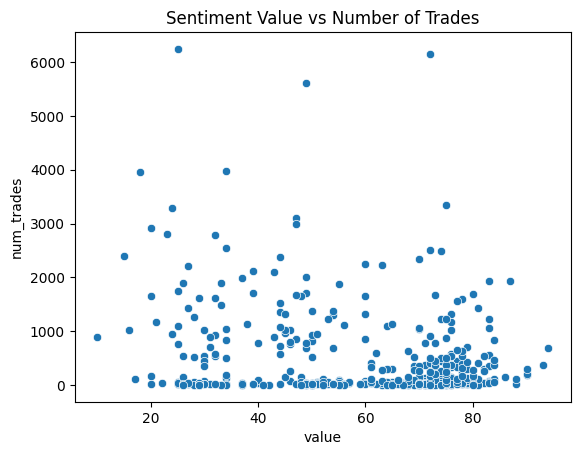

In [10]:
plt.figure()
sns.scatterplot(data=merged, x='value', y='num_trades')
plt.title('Sentiment Value vs Number of Trades')
plt.show()

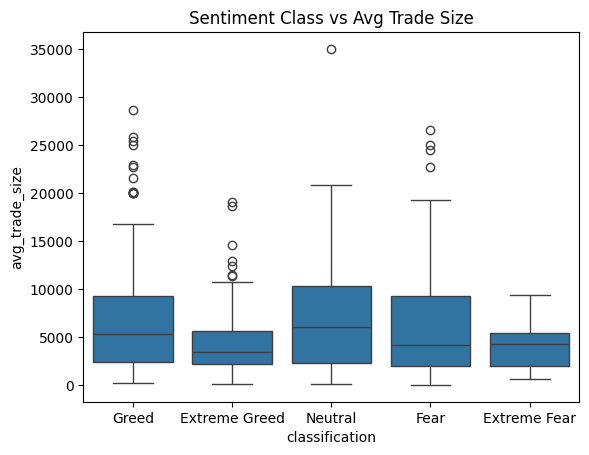

In [11]:
merged['avg_trade_size'] = merged['total_volume'] / merged['num_trades']
plt.figure()
sns.boxplot(data=merged, x='classification', y='avg_trade_size')
plt.title('Sentiment Class vs Avg Trade Size')
plt.show()

**5. Correlation matrix**

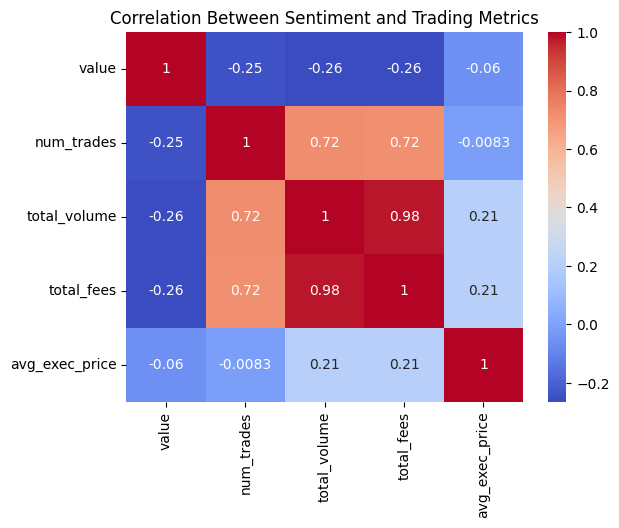

In [12]:
plt.figure()
corr = merged[['value', 'num_trades', 'total_volume', 'total_fees', 'avg_exec_price']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Sentiment and Trading Metrics")
plt.show()

**6. Statistical analysis**

6.1 Pearson correlation

In [13]:
print("\nPearson Correlation:")
print(merged[['value', 'num_trades', 'total_volume', 'total_fees', 'avg_exec_price']].corr(method='pearson'))


Pearson Correlation:
                   value  num_trades  total_volume  total_fees  avg_exec_price
value           1.000000   -0.245241     -0.264371   -0.260932       -0.060238
num_trades     -0.245241    1.000000      0.720137    0.715468       -0.008288
total_volume   -0.264371    0.720137      1.000000    0.978430        0.206365
total_fees     -0.260932    0.715468      0.978430    1.000000        0.208337
avg_exec_price -0.060238   -0.008288      0.206365    0.208337        1.000000


6.2 Spearman correlation

In [14]:
print("\nSpearman Correlation:")
print(merged[['value', 'num_trades', 'total_volume', 'total_fees', 'avg_exec_price']].corr(method='spearman'))


Spearman Correlation:
                   value  num_trades  total_volume  total_fees  avg_exec_price
value           1.000000   -0.032592     -0.056234   -0.193887       -0.092991
num_trades     -0.032592    1.000000      0.897754    0.830679        0.196975
total_volume   -0.056234    0.897754      1.000000    0.917214        0.427264
total_fees     -0.193887    0.830679      0.917214    1.000000        0.481668
avg_exec_price -0.092991    0.196975      0.427264    0.481668        1.000000


6.3 T-test: Fear vs Greed (on number of trades)

In [15]:
fear_trades = merged[merged['classification'] == 'Fear']['num_trades']
greed_trades = merged[merged['classification'] == 'Greed']['num_trades']

In [16]:
t_stat, p_value = stats.ttest_ind(fear_trades, greed_trades, equal_var=False)
print(f"\nT-test: Fear vs Greed (num_trades) -> t = {t_stat:.2f}, p = {p_value:.4f}")


T-test: Fear vs Greed (num_trades) -> t = 3.62, p = 0.0004


**7. Linear Regression model**

In [17]:
X = merged[['value']]
y = merged['num_trades']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test)

In [20]:
print("\nLinear Regression Results:")
print("R² score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


Linear Regression Results:
R² score: 0.06325096698670674
Mean Squared Error: 838804.1637522489


**8. Line Plot: Sentiment vs Volume Over Time**

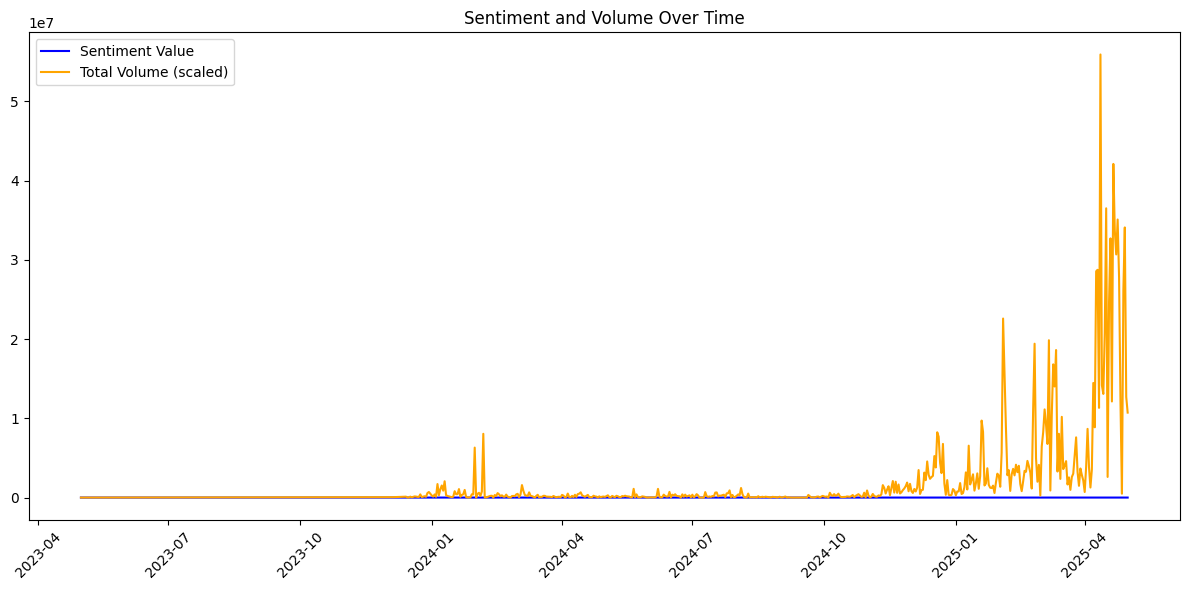

In [21]:
plt.figure(figsize=(12,6))
plt.plot(merged['date'], merged['value'], label='Sentiment Value', color='blue')
plt.plot(merged['date'], merged['total_volume'], label='Total Volume (scaled)', color='orange')
plt.title("Sentiment and Volume Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()